In [4]:
import pandas as pd
import numpy as np
from datetime import *

# Parseo Datos

### Agenda

---



- Transformación de datos:
    - reemplazos
    - duplicados
    - cuantiles y outliers
    - mapeo
    - renombrar indices
    

- Variables Categoricas



### Reemplazo de valores con `pandas`

---

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html


In [7]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


Reemplazo todas las ocurrencias del 0 por 5

In [8]:
df.replace(0, 5)

,A,B,C
0,5,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [4]:
df.replace([0,1], 100)

,A,B,C
0,100,5,a
1,100,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [9]:
df.replace([0,1], [-100,100])

,A,B,C
0,-100,5,a
1,100,6,b
2,2,7,c
3,3,8,d
4,4,9,e


Reemplazo todas las ocurrencias del (0 an la columna A y 5 en la columna B) por 100

In [10]:
df.replace({'A': 0, 'B': 7}, 100)

,A,B,C
0,100,5,a
1,1,6,b
2,2,100,c
3,3,8,d
4,4,9,e


Reemplazo en la columna A todas las ocurrencias de 0 por 100 y de 4 por 400

In [7]:
df.replace({ 'A': {0: 100, 4: 400} } )

,A,B,C
0,100,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,400,9,e


Reemplazo en la columna A todas las ocurrencias de 0 por 100 y de 4 por 400, y en la columna C todas las ocurrencias de e por z

In [8]:
df.replace({'A': {0: 100, 4: 400}, 'C': {'e': 'z'}})

,A,B,C
0,100,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,400,9,z


Se pueden usar expresiones regulares:

In [12]:
df_re = pd.DataFrame({'A': ['bat', 'foo', 'bait'],
                      'B': ['abc', 'bar', 'xyz']})

df_re

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [14]:
#  $ hace que solo reconozca bat y no bait, por que fuerza a que el . sea el ukltimo char de la linea

df_re.replace(to_replace=r'ba.$', value='XXX', regex=True)

,A,B
0,XXX,abc
1,foo,XXX
2,bait,xyz


In [11]:
df_re.replace(to_replace=r'ba.', value='XXX', regex=True)

,A,B
0,XXX,abc
1,foo,XXX
2,XXXt,xyz


In [117]:
df_re.replace(to_replace=r'ba.+', value='XXX', regex=True)

,A,B
0,XXX,abc
1,foo,XXX
2,XXX,xyz


In [119]:
# solo columna A
df_re.replace({'A': r'^ba.$'}, 'hola', regex=True)

,A,B
0,hola,abc
1,foo,bar
2,bait,xyz


In [16]:
df_re.replace(regex={r'^ba.$': 'regex', 'foo': 'XXX'})

,A,B
0,regex,abc
1,XXX,regex
2,bait,xyz


### Remover duplicados

In [17]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


* `duplicated()` devuelve un booleano identificando los casos duplicados.
* `drop_duplicates()` devuelve el `DataFrame` sin los casos duplicados

In [20]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [17]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [18]:
# es lo mismo
data[~data.duplicated()] == data.drop_duplicates()

,k1,k2
0,True,True
2,True,True
3,True,True
5,True,True


* Se puede utilizar `drop_duplicates()` para eliminar duplicados en una sola columna o en un set de columnas.

* con keep, le decimos con cual nos quedamos

In [22]:
# Podemos definir algunos parámetros:

data.drop_duplicates(['k2'])

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [20]:
data['k3'] = range(7)
data

,k1,k2,k3
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [21]:
data.drop_duplicates(['k1'])

,k1,k2,k3
0,one,1,0
3,two,3,3


In [22]:
data.drop_duplicates(['k1', 'k2'])

,k1,k2,k3
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


### Mapear y transformar los datos
A partir de un diccionario, se puede crear una nueva columna para un Dataframe donde las claves del mismo se vinculen con una de las series y los valores formen parte de la nueva columna.

In [40]:
data = pd.DataFrame({'platos': ['panceta', 'bondiola', 'panceta', 'Pastrami',
                           'pavita', 'Panceta', 'pastrami', 'jamon crudo',
                           'nova lox'],
                  'peso': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,platos,peso
0,panceta,4.0
1,bondiola,3.0
2,panceta,12.0
3,Pastrami,6.0
4,pavita,7.5
5,Panceta,8.0
6,pastrami,3.0
7,jamon crudo,5.0
8,nova lox,6.0


In [25]:
data.platos.unique()

array(['panceta', 'bondiola', 'Pastrami', 'pavita', 'Panceta', 'pastrami',
       'jamon crudo', 'nova lox'], dtype=object)

* La idea es ahora poder asignar a cada `plato` un determinado `animal`. Una opción es hacerlo con los métodos `.map()` o `.apply()`.

Repaso:

    1)  pd.DataFrame.apply: Opera sobre filas o columnas completas
    2)  pd.DataFrame.applymap: Opera sobre cada uno de los elementos del Dataframe
    3)  pd.Series.apply: Opera sobre cada uno de los elementos de la Serie. 
    4)  pd.Series.map: Opera sobre cada uno de los elementos de la Serie, muy similar a Series.apply. Una diferencia importante es que map puede recibir una serie o un diccionario, además de una función.

In [39]:
plato_a_animal = {
  'panceta': 'cerdo',
  'bondiola': 'cerdo',
  'pastrami': 'vaca',
  'pavita': 'pavo',
  'jamon crudo': 'cerdo',
  'nova lox': 'salmon'
}

In [26]:
str.lower

<method 'lower' of 'str' objects>

In [42]:
data['platos'] = data['platos'].map(str.lower)
data['animal'] = data['platos'].map(plato_a_animal)
data

,platos,peso,animal
0,panceta,4.0,cerdo
1,bondiola,3.0,cerdo
2,panceta,12.0,cerdo
3,pastrami,6.0,vaca
4,pavita,7.5,pavo
5,panceta,8.0,cerdo
6,pastrami,3.0,vaca
7,jamon crudo,5.0,cerdo
8,nova lox,6.0,salmon


* Podríamos también pasar una función que haga todo en un solo paso:

In [27]:
data['platos'].map( lambda x: plato_a_animal[x.lower()] )

0     cerdo
1     cerdo
2     cerdo
3      vaca
4      pavo
5     cerdo
6      vaca
7     cerdo
8    salmon
Name: platos, dtype: object

* En este caso, funciona también con Series.apply():

In [28]:
data['platos'].apply( lambda x: plato_a_animal[x.lower()] )

0     cerdo
1     cerdo
2     cerdo
3      vaca
4      pavo
5     cerdo
6      vaca
7     cerdo
8    salmon
Name: platos, dtype: object

### Renombrar índices de los ejes

In [47]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Buenos Aires', 'Cordoba', 'Mendoza'],
                 columns=['uno', 'dos', 'tres', 'cuatro'])
data

,uno,dos,tres,cuatro
Buenos Aires,0,1,2,3
Cordoba,4,5,6,7
Mendoza,8,9,10,11


In [31]:
data.index

Index(['Buenos Aires', 'Cordoba', 'Mendoza'], dtype='object')

In [32]:
data.columns

Index(['uno', 'dos', 'tres', 'cuatro'], dtype='object')

In [52]:
# usamos el metodo de una serie en un objeto indice
data.columns.map(lambda x: x.replace(' ','_').lower())


Index(['uno', 'dos', 'tres', 'cuatro'], dtype='object')

In [37]:
str.upper('iuii')

'IUII'

In [44]:
str.title('asdfasdf sdgsdag')

'Asdfasdf Sdgsdag'

In [53]:
data.rename(index=str.title, columns=str.upper)

# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.title.html

,UNO,DOS,TRES,CUATRO
Buenos Aires,0,1,2,3
Cordoba,4,5,6,7
Mendoza,8,9,10,11


In [45]:
str.upper('32423')

'32423'

In [54]:
data

,uno,dos,tres,cuatro
Buenos Aires,0,1,2,3
Cordoba,4,5,6,7
Mendoza,8,9,10,11


In [60]:
data2=data.rename(index={'Cordoba': 'SANTA FE'},
            columns={'tres': 'ocho'})

In [61]:
data2

,uno,dos,ocho,cuatro
Buenos Aires,0,1,2,3
SANTA FE,4,5,6,7
Mendoza,8,9,10,11


In [59]:
data.rename(index={'Cordoba': 'SANTA FE'}, inplace=True)
data

,uno,dos,tres,cuatro
Buenos Aires,0,1,2,3
SANTA FE,4,5,6,7
Mendoza,8,9,10,11


### Detectar y filtrar outliers


### Variables Cualitativas y Cuantitativas

---

Las variables pueden ser caracterizadas como:

* **cuantitativas**: 

    Una variable cuantitativa toma valores numéricos, como en el caso de del ingreso de una persona o el precio de una casa.  

* **cualitativas**:  

    - Una variable cualitativa toma valores en una de K diferentes clases o categorías.
    - Una variable cualitativa con dos posibles valores se denomina **binaria o dicotómica**.

### Tipos de una variable cualitativa


#### Nominal/Categórica. Categorías nombradas.

* Se suele asignar **valores o rótulos numéricos** a las variables categóricas: Estado civil, 0 si soltero y 1 si casado y 2 si divorciado

* Los números utilizados para rotular son arbitrarios. 

* En general, el software asume que los valores numéricos reflejan cantidades algebraicas y, por tanto, un cierto orden.

* La principal medida de posición es la **moda**. La mediana y la media no están definidas (y en general cualquier operación numérica tampoco).





#### Ordinal. 

* Es similar a una categórica pero existe un orden claro. 




In [71]:
prop=pd.read_csv('prope_small.csv',index_col=0)

In [143]:
prop

,tipo,barrio,sup,pm2,rooms
0,apartment,Villa Pueyrredón,80.0,2725.00,4.0
1,apartment,Caballito,37.0,1560.49,1.0
2,apartment,Tribunales,70.0,1757.14,3.0
3,apartment,Palermo,123.0,2520.33,4.0
4,apartment,Colegiales,47.0,2829.79,2.0
...,...,...,...,...,...
2545,house,Liniers,180.0,1055.56,3.0
2546,house,Villa Devoto,246.0,1077.24,3.0
2547,house,Palermo,220.0,1086.36,5.0
2548,house,Versalles,85.0,1352.94,3.0


In [73]:
prop.tipo.unique()

array(['apartment', 'PH', 'house'], dtype=object)

In [145]:
prop.corr()

,sup,pm2,rooms
sup,1.000000,-0.278000,0.448291
pm2,-0.278000,1.000000,-0.290526
rooms,0.448291,-0.290526,1.000000


In [144]:
prop.tipo.value_counts()

house        850
apartment    850
PH           850
Name: tipo, dtype: int64

<AxesSubplot:>

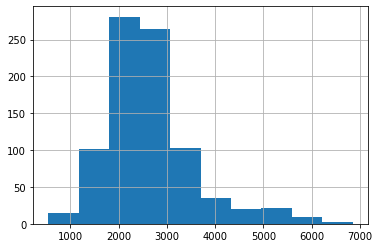

In [50]:
prop[prop.tipo=='apartment'].pm2.hist()

<AxesSubplot:>

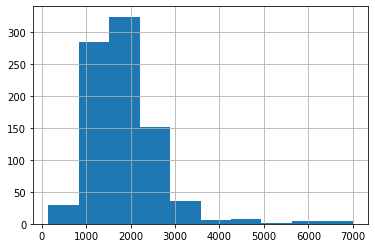

In [51]:
prop[prop.tipo=='PH'].pm2.hist()

<AxesSubplot:>

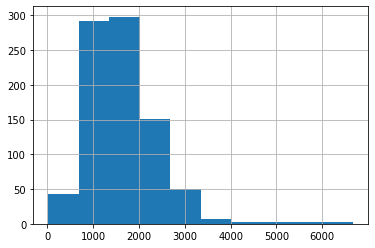

In [52]:
prop[prop.tipo=='house'].pm2.hist()

#### Variables Dummies

* Una **variable dummy** (variable indicadora) es una variable cualitativa que toma valores 0 o 1 para indicar la ausencia o presencia de algún atributo o efecto categórico

* Formalmente una variable dummy puede ser expresada mediante una **función indicadora**:

\begin{equation}
  D_i= \mathbb{I}_A(x_i) = \begin{cases}
    1, & \text{si $x_i \in A$} \\    
    0, & \text{si $x_i \not \in A$}
  \end{cases}
\end{equation}




* ¿Cuál es la relación entre variables categóricas y variables dummies?

    - Una variable categórica con N categorías puede ser expresada en términos de N−1 variables dummies (one-hot encoding).

    - Resuelve el problema de interpretar las etiquetas numéricas como un intervalo.

    - Si las categorías tienen muchos valores aumenta considerablemente la dimensionalidad de los datos.


#### Ejemplo

Supongamos que tenemos una variable categórica, C, que registra la ciudad en la que reside una muestra de habitantes de la Argentina.

Asumamos que la variable puede tomar 4 posibles valores: Buenos Aires, Rosario, Córdoba y Mar del Plata.

Imaginemos que tenemos las siguiente 5 observaciones:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M2/CLASE_12_DataWrangling/Presentacion/img/M2_CLASE_12_ejemplo_categorica.png" align="center"></img>





Podemos representar estas observaciones de la variable categórica usando dummies como:    

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M2/CLASE_12_DataWrangling/Presentacion/img/M2_CLASE_12_dummies.png" align="center"></img>



---

Es importante notar que **si existen k categorías, k-1 variables Dummies son suficientes para representarlas**.



In [74]:
prop

,tipo,barrio,sup,pm2,rooms
0,apartment,Villa Pueyrredón,80.0,2725.00,4.0
1,apartment,Caballito,37.0,1560.49,1.0
2,apartment,Tribunales,70.0,1757.14,3.0
3,apartment,Palermo,123.0,2520.33,4.0
4,apartment,Colegiales,47.0,2829.79,2.0
...,...,...,...,...,...
2545,house,Liniers,180.0,1055.56,3.0
2546,house,Villa Devoto,246.0,1077.24,3.0
2547,house,Palermo,220.0,1086.36,5.0
2548,house,Versalles,85.0,1352.94,3.0


In [75]:
pd.get_dummies(prop, columns=['tipo'])

,barrio,sup,pm2,rooms,tipo_PH,tipo_apartment,tipo_house
0,Villa Pueyrredón,80.0,2725.00,4.0,0,1,0
1,Caballito,37.0,1560.49,1.0,0,1,0
2,Tribunales,70.0,1757.14,3.0,0,1,0
3,Palermo,123.0,2520.33,4.0,0,1,0
4,Colegiales,47.0,2829.79,2.0,0,1,0
...,...,...,...,...,...,...,...
2545,Liniers,180.0,1055.56,3.0,0,0,1
2546,Villa Devoto,246.0,1077.24,3.0,0,0,1
2547,Palermo,220.0,1086.36,5.0,0,0,1
2548,Versalles,85.0,1352.94,3.0,0,0,1


In [77]:
pd.get_dummies(prop , drop_first = True)

,sup,pm2,rooms,tipo_apartment,tipo_house,barrio_Agronomía,barrio_Almagro,barrio_Balvanera,barrio_Barracas,barrio_Barrio Norte,...,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque
0,80.0,2725.00,4.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,37.0,1560.49,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70.0,1757.14,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,123.0,2520.33,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,47.0,2829.79,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,180.0,1055.56,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2546,246.0,1077.24,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2547,220.0,1086.36,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2548,85.0,1352.94,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
pd.get_dummies(prop , drop_first = True).corr()

,sup,pm2,rooms,tipo_apartment,tipo_house,barrio_Agronomía,barrio_Almagro,barrio_Balvanera,barrio_Barracas,barrio_Barrio Norte,...,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque
sup,1.000000,-0.278000,0.448291,-2.741350e-01,3.928570e-01,0.016517,0.033986,-0.025926,0.025204,-0.030981,...,0.020762,0.003462,0.001612,0.002224,-0.005053,0.010100,-0.007485,-0.009139,-0.040190,0.015554
pm2,-0.278000,1.000000,-0.290526,4.531984e-01,-3.048741e-01,-0.014205,-0.042153,-0.041440,-0.091686,0.108363,...,-0.149091,-0.055995,0.048115,-0.024432,-0.044287,-0.026972,0.017739,-0.048539,0.049909,-0.047049
rooms,0.448291,-0.290526,1.000000,-4.527727e-01,4.645458e-01,0.043172,0.049411,0.003334,0.029798,-0.041161,...,0.008697,0.005558,0.039775,0.016479,-0.009187,-0.006403,0.010477,0.010559,-0.038635,0.011437
tipo_apartment,-0.274135,0.453198,-0.452773,1.000000e+00,-5.000000e-01,-0.012537,-0.016307,0.059625,-0.035652,0.102033,...,-0.086690,-0.059787,-0.028028,-0.055091,-0.061265,-0.014006,-0.033849,0.014014,0.060475,-0.067144
tipo_house,0.392857,-0.304874,0.464546,-5.000000e-01,1.000000e+00,0.006268,-0.021199,-0.074531,0.029710,-0.071887,...,0.090379,0.032986,0.035034,0.036728,-0.003224,0.028011,0.004231,0.014014,-0.034182,0.041738
barrio_Agronomía,0.016517,-0.014205,0.043172,-1.253678e-02,6.268391e-03,1.000000,-0.007769,-0.005873,-0.006332,-0.005378,...,-0.006822,-0.006074,-0.001757,-0.006139,-0.003840,-0.000878,-0.002917,-0.001757,-0.009807,-0.006939
barrio_Almagro,0.033986,-0.042153,0.049411,-1.630716e-02,-2.119931e-02,-0.007769,1.000000,-0.023224,-0.025039,-0.021267,...,-0.026974,-0.024017,-0.006947,-0.024276,-0.015186,-0.003472,-0.011536,-0.006947,-0.038778,-0.027438
barrio_Balvanera,-0.025926,-0.041440,0.003334,5.962469e-02,-7.453087e-02,-0.005873,-0.023224,1.000000,-0.018929,-0.016078,...,-0.020393,-0.018157,-0.005252,-0.018353,-0.011481,-0.002625,-0.008722,-0.005252,-0.029317,-0.020744
barrio_Barracas,0.025204,-0.091686,0.029798,-3.565244e-02,2.971037e-02,-0.006332,-0.025039,-0.018929,1.000000,-0.017334,...,-0.021986,-0.019576,-0.005662,-0.019787,-0.012377,-0.002830,-0.009403,-0.005662,-0.031607,-0.022364
barrio_Barrio Norte,-0.030981,0.108363,-0.041161,1.020330e-01,-7.188687e-02,-0.005378,-0.021267,-0.016078,-0.017334,1.000000,...,-0.018674,-0.016627,-0.004810,-0.016807,-0.010513,-0.002403,-0.007987,-0.004810,-0.026846,-0.018996


In [80]:
pd.get_dummies(prop).corr().loc['pm2'].sort_values().head(10)

tipo_house            -0.304874
rooms                 -0.290526
sup                   -0.278000
barrio_Mataderos      -0.184406
barrio_Villa Lugano   -0.149091
tipo_PH               -0.148324
barrio_Liniers        -0.108831
barrio_Flores         -0.095743
barrio_Floresta       -0.094525
barrio_Barracas       -0.091686
Name: pm2, dtype: float64

In [152]:
pd.get_dummies(prop, columns=['tipo']).corr()

,sup,pm2,rooms,tipo_PH,tipo_apartment,tipo_house
sup,1.000000,-0.278000,0.448291,-0.118722,-0.274135,0.392857
pm2,-0.278000,1.000000,-0.290526,-0.148324,0.453198,-0.304874
rooms,0.448291,-0.290526,1.000000,-0.011773,-0.452773,0.464546
tipo_PH,-0.118722,-0.148324,-0.011773,1.000000,-0.500000,-0.500000
tipo_apartment,-0.274135,0.453198,-0.452773,-0.500000,1.000000,-0.500000
tipo_house,0.392857,-0.304874,0.464546,-0.500000,-0.500000,1.000000


### Categorizacion de variables continuas con `pandas`

El proceso de transformar una variable numérica en categórica se llama discretización. 

El método `cut` separa valores en intervalos discretos, devolviendo el intervalo semi-cerrado al que pertenece cada valor. Permite transformar variables continuas en categóricas.

El argumento `bins` puede ser un entero que indica la cantidad de intervalos de igual "ancho" a construir, o puede ser una lista en la que especificamos los límites de cada categoría.

El argumento `right` indica si el intervalos incluye el valor límite por la derecha.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [82]:
rng = np.random.default_rng()

a_values = rng.integers(low = 0, high = 100, size = 10)

b_values = rng.integers(low = 100, high = 500, size = 10)

data = pd.DataFrame({'A':a_values, 'B': b_values})
data

,A,B
0,59,329
1,61,253
2,22,219
3,22,273
4,16,257
5,43,124
6,17,178
7,35,173
8,23,272
9,36,110


In [156]:
data.A.describe()

count    10.000000
mean     41.900000
std      25.980548
min      11.000000
25%      14.250000
50%      51.000000
75%      61.250000
max      79.000000
Name: A, dtype: float64

In [157]:
data.B.describe()

count     10.000000
mean     331.200000
std       95.723909
min      143.000000
25%      277.750000
50%      345.500000
75%      383.000000
max      476.000000
Name: B, dtype: float64

Definimos 5 categorias para los valores de A, con límites 0, 30, 40, 50, 60, 100

In [83]:
data.A

0    59
1    61
2    22
3    22
4    16
5    43
6    17
7    35
8    23
9    36
Name: A, dtype: int64

In [84]:
# Defino los valores de corte
bins = [0, 30, 40, 50, 60, 100]




A_categories = pd.cut(data.A, bins, right = False)





A_categories.dtype

CategoricalDtype(categories=[[0, 30), [30, 40), [40, 50), [50, 60), [60, 100)], ordered=True)

In [85]:
A_categories

0     [50, 60)
1    [60, 100)
2      [0, 30)
3      [0, 30)
4      [0, 30)
5     [40, 50)
6      [0, 30)
7     [30, 40)
8      [0, 30)
9     [30, 40)
Name: A, dtype: category
Categories (5, interval[int64, left]): [[0, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 100)]

Contamos cuantos elementos hay en cada categoría de A

In [163]:
A_categories.value_counts()

[0, 30)      4
[60, 100)    3
[50, 60)     2
[40, 50)     1
[30, 40)     0
Name: A, dtype: int64

Creamos categorías con etiquetas asociadas usando el argumento `labels`

In [87]:
group_labels = ['muy poco', 'poco', 'normal', 'mucho', 'demasiado' ]


A_categories_labels = pd.cut(data.A, bins, labels = group_labels)


A_categories_labels.value_counts()

muy poco     5
poco         2
normal       1
mucho        1
demasiado    1
Name: A, dtype: int64

In [88]:
A_categories_labels

0        mucho
1    demasiado
2     muy poco
3     muy poco
4     muy poco
5       normal
6     muy poco
7         poco
8     muy poco
9         poco
Name: A, dtype: category
Categories (5, object): ['muy poco' < 'poco' < 'normal' < 'mucho' < 'demasiado']

---

Ya vimos cómo podemos usar cuantilos para especificar los límites de los intervalos de cada categoría en lugar de definir valores arbitarios. Usando qcut()

In [167]:
# ahora tenemos una columna categorica usando la informacion de A
# podriamos usar esa columna para algunos modelos

data['A_cat'] = A_categories_labels
data

,A,B,A_cat
0,59,272,mucho
1,11,476,muy poco
2,55,425,mucho
3,11,385,muy poco
4,64,143,demasiado
5,79,337,demasiado
6,18,295,muy poco
7,47,354,normal
8,62,248,demasiado
9,13,377,muy poco


### 'Dummyficacion' de variables con `pandas`

Pandas provee con el método `pd.get_dummies` que recibe una Serie o una lista de Series y realiza one hot encoding.

Recordemos que una variable con k categorías se puede representar con k-1 variables.

Por eso un parámetro clave de `pd.get_dummies` es `drop_first = True` que genera k-1 categorías en lugar de k.

El argumento `prefix` nos permite establecer un prefijo para el nombre de cada una de las columnas de categorías que representan la variable. Este argumento es especialmente útil cuando construimos dummies de más de una columna de un DataFrame, para evitar confusiones sobre cuál es las variable original que corresponde a cada columna de categoría.


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html


In [168]:
data

,A,B,A_cat
0,59,272,mucho
1,11,476,muy poco
2,55,425,mucho
3,11,385,muy poco
4,64,143,demasiado
5,79,337,demasiado
6,18,295,muy poco
7,47,354,normal
8,62,248,demasiado
9,13,377,muy poco


In [169]:
A_categories_1_dummies = pd.get_dummies(data, drop_first = True, prefix = 'A_cat1')
A_categories_1_dummies

,A,B,A_cat1_poco,A_cat1_normal,A_cat1_mucho,A_cat1_demasiado
0,59,272,0,0,1,0
1,11,476,0,0,0,0
2,55,425,0,0,1,0
3,11,385,0,0,0,0
4,64,143,0,0,0,1
5,79,337,0,0,0,1
6,18,295,0,0,0,0
7,47,354,0,1,0,0
8,62,248,0,0,0,1
9,13,377,0,0,0,0


<div class="div-dhds-fondo-1"> Referencias

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M2/CLASE_12_DataWrangling/Presentacion/img/M2_CLASE_12_separador.png" align="center"></img>    
</div>


### Referencias

---

DataFrame.replace

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

Series.map

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

cut

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html


Timestamp

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

Period

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html



<div class="div-dhds-fondo-1"> Hands-on

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M2/CLASE_12_DataWrangling/Presentacion/img/M2_CLASE_12_separador.png" align="center"></img>    
</div>


Dado el dataset `data` que tiene como columnas

* A de tipo numérico entre 0 y 100

* B de tipo numérico que representa un timestamp


In [111]:
# creamos data:

from datetime import datetime as dt 

one_year = pd.DateOffset(years=1)

max_b = dt.now()

max_b_timestamp = datetime.timestamp(max_b)

min_b = max_b - one_year

min_b_timestamp = datetime.timestamp(min_b)

#print(min_b_timestamp)

#print(max_b_timestamp)

seconds_in_one_year = max_b_timestamp - min_b_timestamp

seconds_in_one_year == 60 * 60 * 24 * 366 # 2020 fue bisiesto

rng = np.random.default_rng()

a_values = rng.integers(low = 0, high = 100, size = 30)

b_values = rng.integers(low = min_b_timestamp, high = max_b_timestamp, size = 30)

data = pd.DataFrame({'A':a_values, 'B': b_values})
data.head(5)



,A,B
0,22,1607829710
1,18,1612560728
2,39,1607065620
3,7,1605363752
4,38,1622923735


### Ejercicio 1

Agregar al dataset una columna `C`, de tipo categórica, definida en base a los valores de `A`, con las categorías asociadas a los intervalos de límites 0, 30, 40, 50, 60, 100, y con etiquetas 'muy poco', 'poco', 'normal', 'mucho', 'demasiado' 

### Ejercicio 2

Convertir la variable categórica creada `C`, en variables dummies y crear un nuevo dataset `data_with_dummies` que resulte de combinar los datos de `data` con las variables dummies 


### Ejercicio 3

Convertir la variable B en tipo datetime, y luego en un string con este formato '2021-02-22' donde representamos el año con 4 dígitos, el mes con 2, y el día con 2.

Crear la columna `D` con el resultado de convertir la variable `B` en string.

Sugerencia:

Pueden consultar la documentacion https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


### Solución

---


### Ejercicio 1

In [112]:
bins = [0, 30, 40, 50, 60, 100]

group_labels = ['muy poco', 'poco', 'normal', 'mucho', 'demasiado' ]

A_categories_labels = pd.cut(data.A, bins, labels = group_labels)

data['C'] = A_categories_labels

data.sample(5)

,A,B,C
19,94,1607181123,demasiado
0,22,1607829710,muy poco
17,62,1603019866,demasiado
10,10,1614083611,muy poco
20,82,1600733765,demasiado


### Ejercicio 2

In [113]:
C_dummies = pd.get_dummies(data.C, drop_first = True, prefix = 'C')
data_with_dummies = pd.concat([data, C_dummies], axis = 1)
data_with_dummies.sample(5)

,A,B,C,C_poco,C_normal,C_mucho,C_demasiado
29,26,1606429242,muy poco,0,0,0,0
13,19,1614460280,muy poco,0,0,0,0
14,27,1619210185,muy poco,0,0,0,0
16,0,1606990986,NaN,0,0,0,0
15,21,1599207372,muy poco,0,0,0,0


### Ejercicio 3

In [114]:
# convertir la variable B en tipo datetime
date_times = pd.to_datetime(data.B, unit='s')
# print(date_times.sample(5))

# definir el formato de salida:
date_format = '%Y-%m-%d'

# convertir cada fecha en string con ese formato
date_times_str = date_times.apply(lambda x: x.strftime(date_format))

# print(date_times_str.sample(5))

# guardar en la columna D
data_with_dummies['D'] = date_times_str

data_with_dummies.head()

,A,B,C,C_poco,C_normal,C_mucho,C_demasiado,D
0,22,1607829710,muy poco,0,0,0,0,2020-12-13
1,18,1612560728,muy poco,0,0,0,0,2021-02-05
2,39,1607065620,poco,1,0,0,0,2020-12-04
3,7,1605363752,muy poco,0,0,0,0,2020-11-14
4,38,1622923735,poco,1,0,0,0,2021-06-05


DatetimeIndex

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html

PeriodIndex

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.PeriodIndex.html

to_datetime

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html